# Kalman Filtering

Kalman Filtering is a mathematical technique used in quantitative finance to estimate and predict the state of a dynamic system from noisy observations, particularly for time-series data. Originally developed in aerospace engineering, it is widely used for tasks like estimating latent variables (volatility, trends), forecasting asset prices, or tracking parameters in trading models. The Kalman filter is a recursive algorithm that optimally updates estimates as new data arrives, balancing model predictions with observed data.

## Technical Explanation
The Kalman filter models a system using a state-space representation with two equations:

State Transition Equation:
$$x_t = F x_{t-1} + B u_t + w_t$$
Where:

$ x_t $: State vector at time $ t $ (e.g., latent variables like trend or volatility)
$ F $: State transition matrix (describes how the state evolves)
$ B $: Control-input matrix (optional, often zero in finance)
$ u_t $: Control vector (external inputs, often absent)
$ w_t $: Process noise, $ w_t \sim N(0, Q) $, where $ Q $ is the process noise covariance


Observation Equation:
$$y_t = H x_t + v_t$$
Where:  

$ y_t $: Observed data (e.g., stock prices)  
$ H $: Observation matrix (maps state to observations)  
$ v_t $: Observation noise, $ v_t \sim N(0, R) $, where $ R $ is the observation noise covariance  



The Kalman filter operates in two steps:

1. Prediction Step:  
Predict the next state: $ \hat{x}_{t|t-1} = F \hat{x}_{t-1|t-1} + B u_t $  
Predict the state covariance: $ P_{t|t-1} = F P_{t-1|t-1} F^T + Q $  


2. Update Step:  
Compute the Kalman gain: $ K_t = P_{t|t-1} H^T (H P_{t|t-1} H^T + R)^{-1} $  
Update the state estimate: $ \hat{x}_{t|t} = \hat{x}_{t|t-1} + K_t (y_t - H \hat{x}_{t|t-1}) $  
Update the state covariance: $ P_{t|t} = (I - K_t H) P_{t|t-1} $  



The Kalman gain $ K_t $ balances the weight given to the model’s prediction versus the new observation, based on their relative uncertainties (via $ P $ and $ R $).

In [ ]:
# Below is a Python script to apply the Kalman filter to estimate 
# the true stock price from noisy observations, simulating a random walk with drift

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
np.random.seed(42)
n_days = 100
mu = 0.05   # Daily drift (annualized ~ 12.6%)
Q = 0.1     # Process noise variance
R = 1.0     # Observation noise variance
x0 = 100.0  # Initial true price
P0 = 1.0    # Initial state covariance

# Simulate true and observed prices
true_prices = np.zeros(n_days)
observed_prices = np.zeros(n_days)
true_prices[0] = x0
for t in range(1, n_days):
    true_prices[t] = true_prices[t-1] + mu + np.random.normal(0, np.sqrt(Q))
observed_prices = true_prices + np.random.normal(0, np.sqrt(R), n_days)

# Kalman Filter implementation
filtered_prices = np.zeros(n_days)
P = P0  # State covariance
x = x0  # Initial state estimate
F = 1   # State transition matrix
H = 1   # Observation matrix

for t in range(n_days):
    # Prediction step
    x_pred = F * x + mu     # Predict state
    P_pred = F * P * F + Q  # Predict covariance

    # Update Step
    K = P_pred * H / (H * P_pred * H + R)  # Kalman gain
    x = x_pred + K * (observed_prices[t] - H * x_pred)  # Update state
    P = (1 - K * H) * P_pred                    # Update covariance
    filtered_prices[t] = x

# Print Sample Results
print(f"Sample True Prices (first 10): {true_prices[:10].round(2)}")
print(f"Sample Observed Prices (first 10): {observed_prices[:10].round(2)}")
print(f"Sample Filtered Prices (first 10): {filtered_prices[:10].round(2)}")

# Calculate RMSE for filtered vs. true prices
rmse = np.sqrt(np.mean((filtered_prices - true_prices)**2))
print(f"RMSE of Filtered Prices: {rmse:.2f}")

# Visualizing the Results


Sample True Prices (first 10): [100.   100.21 100.21 100.47 101.   100.98 100.95 101.5  101.79 101.7
 101.92 101.82 101.72 101.85 101.29 100.8  100.67 100.4  100.55 100.31]
Sample Observed Prices (first 10): [ 99.77  98.79  99.79 100.13 100.2  100.81 101.36 103.39 101.97 101.95
 101.84  99.9  101.7  101.91 103.76 100.61 100.97 100.37  99.38 101.46]
Sample Filtered Prices (first 10): [ 99.9   99.51  99.63  99.82  99.96 100.23 100.58 101.38 101.58 101.71
 101.79 101.31 101.45 101.61 102.23 101.83 101.63 101.33 100.84 101.04]
RMSE of Filtered Prices: 0.49


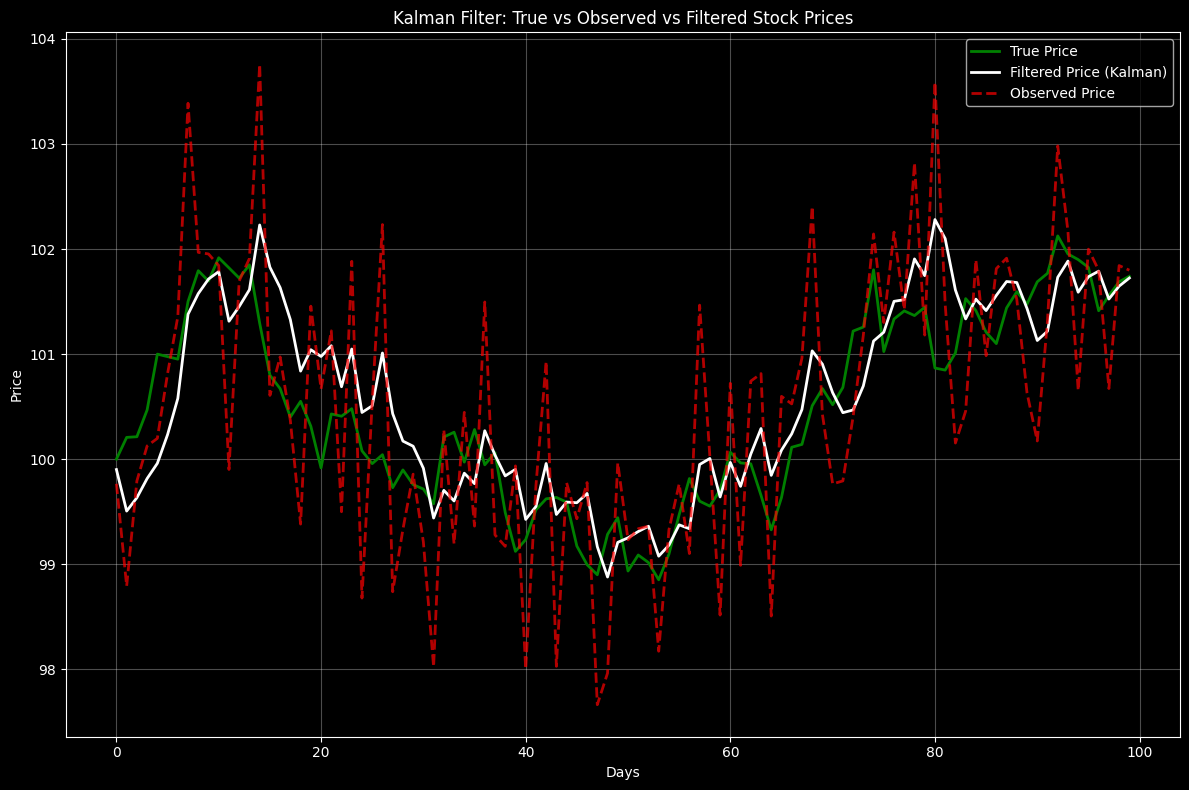

In [10]:
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.plot(range(n_days), true_prices, label="True Price", color='green', linewidth = 2)
plt.plot(range(n_days), filtered_prices, label="Filtered Price (Kalman)", color='white', linewidth = 2)
plt.plot(range(n_days), observed_prices, label="Observed Price", color='red', linewidth = 2, alpha = 0.7, linestyle="--")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.title('Kalman Filter: True vs Observed vs Filtered Stock Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()